# INTRODUCTION
## Analysis 1: HR Employee Analytics

- This analysis is one of the analyses that were performed within the scope of the research on "Comparing the Performance of Machine Learning Algorithms on Balanced and Imbalanced Datasets".
- Semih Gencturk - Yildiz Technical Unversity - Graduation Thesis - Advisor: Prof. Dr. Inci Albayrak - 2024

# CONTENTS

1. Getting Started
2. About Dataset
3. Applying Algorithms
4. Comparing Results
5. Conclusion

# 1. GETTING STARTED

## Install Packages

In [1]:
# install the neccessary packages

# for reading data and formatting information from Excel files
!pip install xlrd 
# to read/write Excel 2010 xlsx/xlsm/xltx/xltm files
!pip install openpyxl 
# Python visualization library based on matplotlib
!pip install seaborn  
# Python module for machine learning built on top of SciPy
!pip install scikit-learn 
# Toolbox for imbalanced dataset in machine learning
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.9 MB/s eta 0:00:00a 0:00:01


## Import Libraries

In [2]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn import metrics, preprocessing, model_selection
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [3]:
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

# 2. ABOUT DATASET

- HR Employee Analytics Data is avaliable on Kaggle: [Here is the link of dataset on kaggle.com](https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics)
- The business case is to predict which employee will turnover.
- There are 14999 records and 11 columns.
- One of the columns is ID, which is not necessary for our use case. There is also the target column, which is called "Left". So, we have 9 features in this dataset.
- In the dataset, 76% of the employees stayed in the company, while 24% of them left the company. So, we have an imbalanced dataset.

|#|Attribute|Explanation|
|--|--|--|
|1|**satisfaction_level**|Employee satisfaction level (from 0 to 1)|
|2|**last_evaluation**|Grade the employee got at their last evaluation (from 0 to 1)|
|3|**number_projects** |Number of projects completed while at work|
|4|**average_monthly_hours** |Average monthly hours at workplace|
|5|**time_spent_company** |Time spent at the company in years|
|6|**work_accident** |Whether the employee had a workplace accident|
|7|**left** |Whether the employee left the workplace or not (**Class**: 1 or 0)|
|8|**promotion_last_5years** |Whether the employee was promoted in the last five years|
|9|**department** |Department in which they work for|
|10|**salary** |Relative level of salary|

## Loading The Data

In [184]:
# load the data file
df = pd.read_excel('./hr_employee_analytics_data.xlsx')

# look at the data
print("Column names:")
print(df.columns.tolist(),'\n')

print('Data dimensions:',df.shape,'\n')

print("Sample 10 data from the dataset:")
df.head(10)

Column names:
['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary'] 

Data dimensions: (14999, 11) 

Sample 10 data from the dataset:


,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low
5,IND08609,0.41,0.50,2,153,3,0,1,0,sales,low
6,IND14345,0.10,0.77,6,247,4,0,1,0,sales,low
7,IND16300,0.92,0.85,5,259,5,0,1,0,sales,low
8,IND27336,0.89,1.00,5,224,5,0,1,0,sales,low
9,IND41409,0.42,0.53,2,142,3,0,1,0,sales,low


## Checking The Data

### Checking missing values:

In [185]:
df.isnull().any()

Emp_Id                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

**Conclusion:** There are no missing values.

### Checking duplicate records:

In [186]:
df[df.duplicated(keep='first')]

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


**Conclusion:** There are no duplicate records.

## Exploring The Data

### Examaning Distribution of The Data

In [187]:
print('Number of people who left the company = {}'.format(len(df[df['left'] == 1])))
print('Number of people who stayed in the company = {}'.format(len(df[df['left'] == 0])))
print('Percentage of people who left the company = {}%'.format(round(float(len(df[df['left'] == 1])) / len(df) * 100), 3))
print('Percentage of people who stayed in the company = {}%'.format(round(float(len(df[df['left'] == 0])) / len(df) * 100), 3))

Number of people who left the company = 3571
Number of people who stayed in the company = 11428
Percentage of people who left the company = 24%
Percentage of people who stayed in the company = 76%


<AxesSubplot:xlabel='left', ylabel='count'>

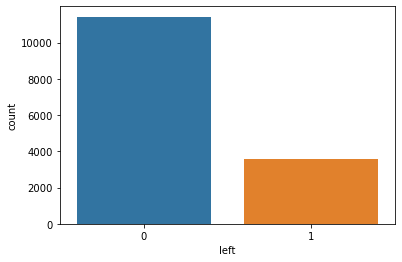

In [188]:
# display these values also in a chart
sns.countplot(x='left', data=df)

**Conclusion**: The data is Imbalanced.

## Preparation of The Data

In [189]:
# Creating dummy variables for categorical attributes 

# In the dataset, there are two categorical variables: salary and Department.
# They should be encoded to numbers.

# Copy the dataset for encoding categorical variables.
df_copy1 = df.copy()

# Prepend strings, so that they can be understandable
df_copy1['salary'] = 'salary_' + df_copy1['salary'].astype(str)
df_copy1['Department'] = 'dept_' + df_copy1['Department'].astype(str)

# Create 'salary' dummies and join
salary_dummies = pd.get_dummies(df_copy1['salary'])
df_copy1 = df_copy1.join(salary_dummies)

# Create 'dept' dummies and join
dept_dummies = pd.get_dummies(df_copy1['Department'])
df_copy1 = df_copy1.join(dept_dummies)

df_copy1.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,IND02438,0.38,0.53,2,157,3,0,1,0,dept_sales,...,0,0,0,0,0,0,0,1,0,0
1,IND28133,0.80,0.86,5,262,6,0,1,0,dept_sales,...,0,0,0,0,0,0,0,1,0,0
2,IND07164,0.11,0.88,7,272,4,0,1,0,dept_sales,...,0,0,0,0,0,0,0,1,0,0
3,IND30478,0.72,0.87,5,223,5,0,1,0,dept_sales,...,0,0,0,0,0,0,0,1,0,0
4,IND24003,0.37,0.52,2,159,3,0,1,0,dept_sales,...,0,0,0,0,0,0,0,1,0,0


**As you can see, there are 24 columns but we should drop 'salary' and 'Department' columns, because they are already represented in seperate columns starting with 'salary_' and 'dept_'.** 

In [190]:
df_copy1.drop(['salary', 'Department'], axis=1, inplace=True)

In [191]:
df_copy1.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,IND02438,0.38,0.53,2,157,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,IND28133,0.80,0.86,5,262,6,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,IND07164,0.11,0.88,7,272,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,IND30478,0.72,0.87,5,223,5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,IND24003,0.37,0.52,2,159,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
# Remove 'Emp_Id' since it doesn't mean anything for the analysis
# Remove 'left' since it is the target column
# Remove 'salary_high' and 'dept_sales' to prevent dummy variable trap
# The Dummy Variable Trap occurs when different  input variables perfectly predict each other – leading to multicollinearity

x = df_copy1.drop(['Emp_Id','left', 'salary_high','dept_sales'], axis=1)
y = df_copy1.left # target feature

# 3. APPLYING ALGORITHMS

In [193]:
seed = 40
test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

print('Train data:', x_train.shape)
print('Test data :', x_test.shape)

Train data: (11249, 18)
Test data : (3750, 18)


In [194]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[ 1.36391481 -1.67474304  1.78548638 ... -0.25484048 -0.41577686
   2.13041097]
 [-1.93872123 -0.27527409 -0.64983853 ... -0.25484048 -0.41577686
   2.13041097]
 [-0.48878346 -0.21696289 -0.64983853 ... -0.25484048 -0.41577686
  -0.469393  ]
 ...
 [ 1.16253456  1.64899571  0.97371141 ... -0.25484048  2.40513624
  -0.469393  ]
 [-0.97209605 -1.14994219 -1.4616135  ... -0.25484048 -0.41577686
   2.13041097]
 [ 0.84032617 -0.39189651  0.97371141 ... -0.25484048 -0.41577686
  -0.469393  ]]


## 3.1. Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2869
           1       0.60      0.36      0.45       881

    accuracy                           0.79      3750
   macro avg       0.71      0.65      0.66      3750
weighted avg       0.77      0.79      0.77      3750



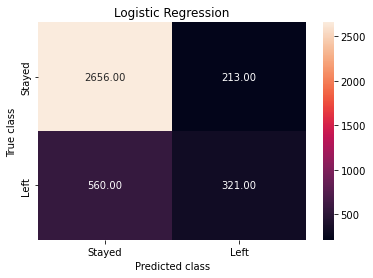

In [195]:
# Fitting Logistic Regression to the training set
lr_classifier = LogisticRegression(random_state = seed)
lr_classifier.fit(x_train, y_train)

# Printing the training score
rf_training_score = lr_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the test set results
y_pred = lr_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
def print_confusion_matrix(y_test, y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Stayed", "Left"], yticklabels = ["Stayed", "Left"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(title)
    
print_confusion_matrix(y_test, y_pred, 'Logistic Regression')

In [196]:
def apply_grid_search(estimator, parameters, scoring, x_train, y_train):
    # StratifiedKFold: a variation of K-Fold Cross-Validation that ensures each fold maintains 
    # the same proportion of observations for each target class as the complete dataset
    kfold = StratifiedKFold(n_splits = 10, shuffle=True, random_state = seed)
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = parameters,
                               scoring = scoring, # it can be the accuracy, it can be the precision, it can be the recall etc.
                               cv = kfold,
                               verbose = 1, # for printing the internal logs
                               n_jobs = -1) # use all the processors
    grid_search = grid_search.fit(x_train, y_train)

    # now look at the results
    print("Training - best score: ", grid_search.best_score_)
    print("Training - best parameters: ", grid_search.best_params_)
    
    return grid_search
    
# Applying Grid Search to find the best model and the best parameters
lr_grid_search_parameters = [{'C':[0.1, 1, 10, 100, 1000],
                              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
                              'penalty':['l1', 'l2']}]

scoring = 'f1_weighted'
lr_grid_search = apply_grid_search(lr_classifier, lr_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Training - best score:  0.7755616576162269
Training - best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2869
           1       0.60      0.36      0.45       881

    accuracy                           0.79      3750
   macro avg       0.71      0.65      0.66      3750
weighted avg       0.77      0.79      0.77      3750



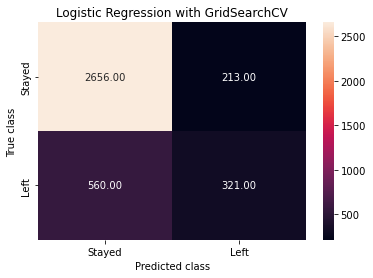

In [197]:
# Predicting the test set results
y_pred = lr_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Logistic Regression with GridSearchCV')

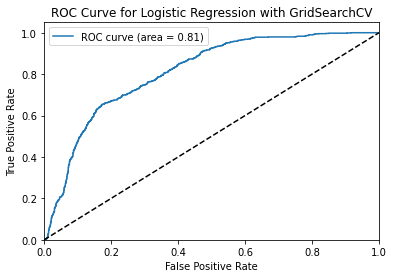

In [198]:
def printROCCurve(x_test, y_test, grid_search, label):
    # Predict probabilities on the test set
    y_pred_proba = grid_search.predict_proba(x_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(label)
    plt.legend()
    plt.show()

printROCCurve(x_test, y_test, lr_grid_search, 'ROC Curve for Logistic Regression with GridSearchCV')

f1=0.454 auc=0.505


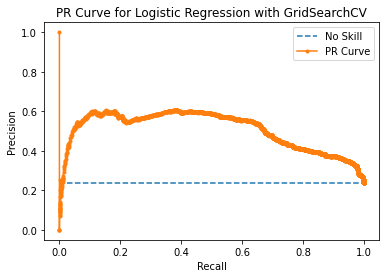

In [199]:
def printPRCurve(x_test, y_test, grid_search, label):
    # Predict probabilities on the test set
    y_pred_proba = grid_search.predict_proba(x_test)[:, 1]
    
    # predict class values
    yhat = grid_search.predict(x_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    f1, _auc = f1_score(y_test, yhat), auc(recall, precision)
    # summarize scores
    print('f1=%.3f auc=%.3f' % (f1, _auc))
    
    # Plot the precision-recall curve
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(label)
    plt.legend()
    plt.show()
    
printPRCurve(x_test, y_test, lr_grid_search, 'PR Curve for Logistic Regression with GridSearchCV')

## 3.2 Random Forest

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2869
           1       0.99      0.96      0.98       881

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750



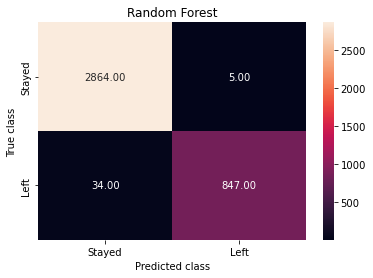

In [200]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = seed)
rf_classifier.fit(x_train, y_train)

# Printing the training score
rf_training_score = rf_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the Test set results
y_pred = rf_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest')

In [201]:
# Applying Grid Search to find the best model and the best parameters
rf_grid_search_parameters = [{'criterion'       : ['gini', 'entropy'],
                              'min_samples_split': [4, 6],
                              'max_features'     : ['sqrt', 'log2'],
                              'max_depth'        : [5, 10, 20],
                              'n_estimators'     : [50, 100]}]

rf_grid_search = apply_grid_search(rf_classifier, rf_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Training - best score:  0.9869255304453881
Training - best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2869
           1       1.00      0.95      0.97       881

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



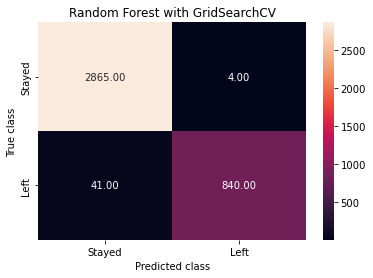

In [202]:
# Predicting the test set results
y_pred = rf_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest with GridSearchCV')

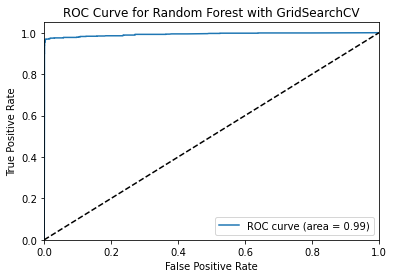

f1=0.974 auc=0.986


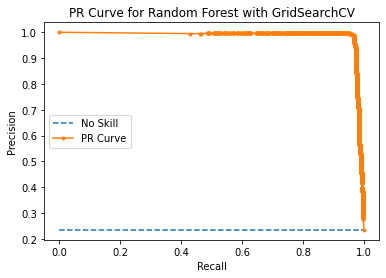

In [203]:
# Print ROC Curve
printROCCurve(x_test, y_test, rf_grid_search, 'ROC Curve for Random Forest with GridSearchCV')

# Print PR Curve
printPRCurve(x_test, y_test, rf_grid_search, 'PR Curve for Random Forest with GridSearchCV')

## 3.3 K-Nearest Neighbors (K-NN)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2869
           1       0.87      0.89      0.88       881

    accuracy                           0.94      3750
   macro avg       0.92      0.93      0.92      3750
weighted avg       0.94      0.94      0.94      3750



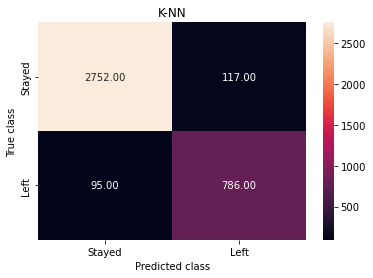

In [204]:
# Fitting K-NN to the Training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(x_test)

# Predicting the Test set results
y_pred = knn_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN')

In [205]:
# Applying Grid Search to find the best model and the best parameters
knn_grid_search_parameters = [{'weights': ['uniform', 'distance'],  
                               'p': [1, 2], #  p = 1 means Manhattan Distance, p = 2 means Euclidean Distance
                               'metric': ['minkowski', 'str']}]

knn_grid_search = apply_grid_search(knn_classifier, knn_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Training - best score:  0.960295655691568
Training - best parameters:  {'metric': 'minkowski', 'p': 2, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.99      0.97      0.97      2869
           1       0.89      0.95      0.92       881

    accuracy                           0.96      3750
   macro avg       0.94      0.96      0.95      3750
weighted avg       0.96      0.96      0.96      3750



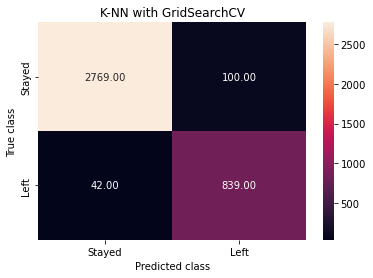

In [206]:
# Predicting the test set results
y_pred = knn_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN with GridSearchCV')

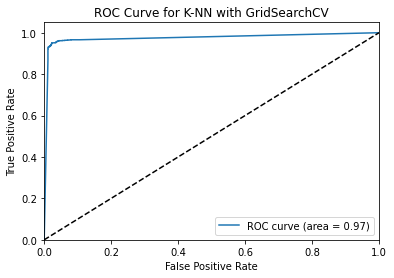

f1=0.922 auc=0.959


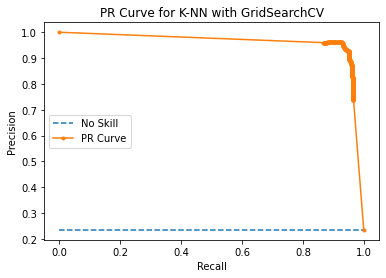

In [207]:
# Print ROC Curve
printROCCurve(x_test, y_test, knn_grid_search, 'ROC Curve for K-NN with GridSearchCV')

# Print PR Curve
printPRCurve(x_test, y_test, knn_grid_search, 'PR Curve for K-NN with GridSearchCV')

## 4. Using SMOTE Algorithm for Oversampling

In [208]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 
   
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_resampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0))) 

Before OverSampling, counts of label '1': 3571
Before OverSampling, counts of label '0': 11428 

After OverSampling, the shape of train_X: (21162, 18)
After OverSampling, the shape of train_y: (21162,) 

After OverSampling, counts of label '1': 11182
After OverSampling, counts of label '0': 9980


In [209]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = test_size, random_state = seed)

print('Train data:', x_train.shape)
print('Test data :', x_test.shape)

Train data: (15871, 18)
Test data : (5291, 18)


In [210]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[-0.49440051 -1.30823775 -1.21928766 ... -0.22765288 -0.39456735
  -0.4508437 ]
 [-1.70151858  1.04365938  2.22045681 ... -0.22765288 -0.39456735
  -0.4508437 ]
 [ 1.49356056  0.30826177  0.84455902 ... -0.22765288 -0.39456735
  -0.4508437 ]
 ...
 [-1.72948396  1.21344073  1.53250791 ... -0.22765288 -0.39456735
  -0.4508437 ]
 [-1.65452943  0.87419166  1.53250791 ... -0.22765288 -0.39456735
  -0.4508437 ]
 [-1.65452943  1.42053125  1.53250791 ... -0.22765288 -0.39456735
  -0.4508437 ]]


              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2503
           1       0.81      0.87      0.84      2788

    accuracy                           0.82      5291
   macro avg       0.82      0.82      0.82      5291
weighted avg       0.82      0.82      0.82      5291



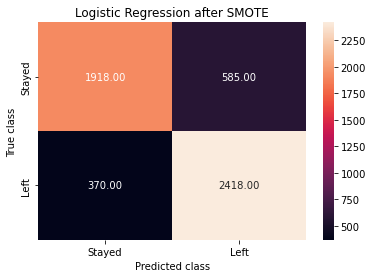

In [211]:
# Fitting Logistic Regression to the training set
lr2_classifier = LogisticRegression(random_state = seed)
lr2_classifier.fit(x_train, y_train)

# Printing the training score
lr2_training_score = lr2_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the test set results
y_pred = lr2_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix   
print_confusion_matrix(y_test, y_pred, 'Logistic Regression after SMOTE')

In [212]:
scoring = 'accuracy'
# Applying Grid Search to find the best model and the best parameters
lr2_grid_search = apply_grid_search(lr2_classifier, lr_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Training - best score:  0.8092122471783494
Training - best parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2503
           1       0.81      0.87      0.84      2788

    accuracy                           0.82      5291
   macro avg       0.82      0.82      0.82      5291
weighted avg       0.82      0.82      0.82      5291



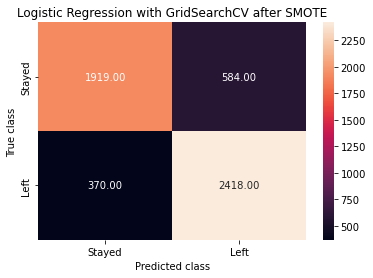

In [214]:
# Predicting the test set results
y_pred = lr2_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Logistic Regression with GridSearchCV after SMOTE')

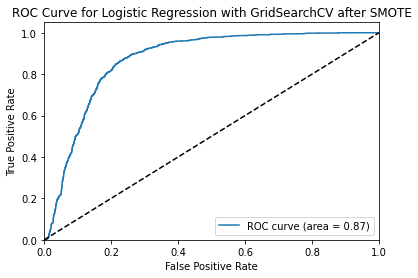

f1=0.835 auc=0.814


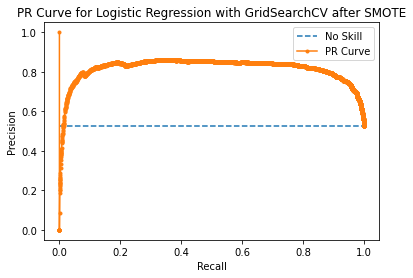

In [215]:
# Print ROC Curve
printROCCurve(x_test, y_test, lr2_grid_search, 'ROC Curve for Logistic Regression with GridSearchCV after SMOTE')

# Print PR Curve
printPRCurve(x_test, y_test, lr2_grid_search, 'PR Curve for Logistic Regression with GridSearchCV after SMOTE')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2503
           1       1.00      0.99      0.99      2788

    accuracy                           0.99      5291
   macro avg       0.99      0.99      0.99      5291
weighted avg       0.99      0.99      0.99      5291



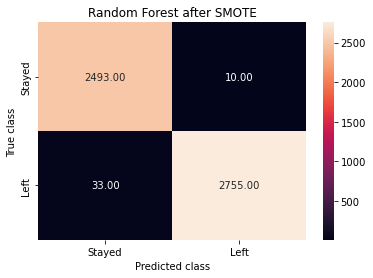

In [216]:
# Fitting Random Forest Classification to the Training set
rf2_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = seed)
rf2_classifier.fit(x_train, y_train)

# Printing the training score
rf2_training_score = rf2_classifier.score(x_train, y_train)
#print("Training score: ", rf_training_score)

# Predicting the Test set results
y_pred = rf2_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest after SMOTE')

In [217]:
# Applying Grid Search to find the best model and the best parameters
rf2_grid_search = apply_grid_search(rf2_classifier, rf_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Training - best score:  0.9903596444029654
Training - best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2503
           1       1.00      0.99      0.99      2788

    accuracy                           0.99      5291
   macro avg       0.99      0.99      0.99      5291
weighted avg       0.99      0.99      0.99      5291



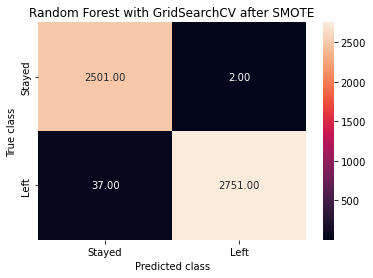

In [218]:
# Predicting the test set results
y_pred = rf2_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'Random Forest with GridSearchCV after SMOTE')

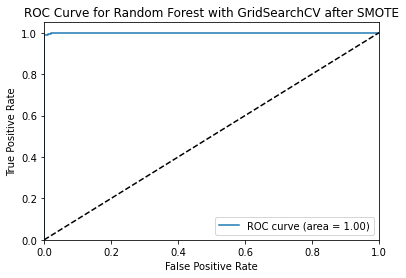

f1=0.993 auc=1.000


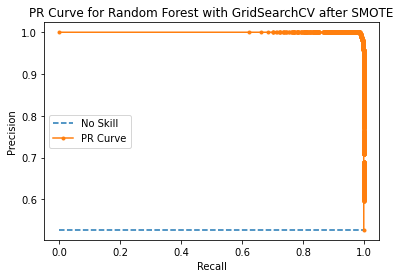

In [219]:
# Print ROC Curve
printROCCurve(x_test, y_test, rf2_grid_search, 'ROC Curve for Random Forest with GridSearchCV after SMOTE')

# Print PR Curve
printPRCurve(x_test, y_test, rf2_grid_search, 'PR Curve for Random Forest with GridSearchCV after SMOTE')

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2503
           1       0.95      0.98      0.96      2788

    accuracy                           0.96      5291
   macro avg       0.96      0.96      0.96      5291
weighted avg       0.96      0.96      0.96      5291



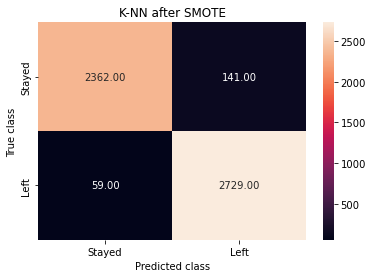

In [220]:
# Fitting K-NN to the Training set
knn2_classifier = KNeighborsClassifier()
knn2_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = knn2_classifier.predict(x_test)

# Predicting the Test set results
y_pred = knn2_classifier.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN after SMOTE')

In [221]:
# Applying Grid Search to find the best model and the best parameters
knn2_grid_search = apply_grid_search(knn2_classifier, knn_grid_search_parameters, scoring, x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Training - best score:  0.9710788935288133
Training - best parameters:  {'metric': 'minkowski', 'p': 1, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2503
           1       0.96      0.99      0.97      2788

    accuracy                           0.97      5291
   macro avg       0.97      0.97      0.97      5291
weighted avg       0.97      0.97      0.97      5291



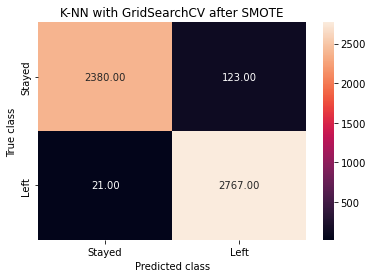

In [222]:
# Predicting the test set results
y_pred = knn2_grid_search.predict(x_test)

# Printing the Classification report
print(classification_report(y_test, y_pred))

# Printing the Confusion Matrix
print_confusion_matrix(y_test, y_pred, 'K-NN with GridSearchCV after SMOTE')

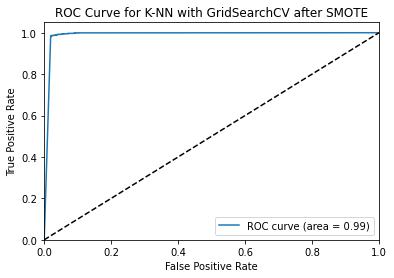

f1=0.975 auc=0.991


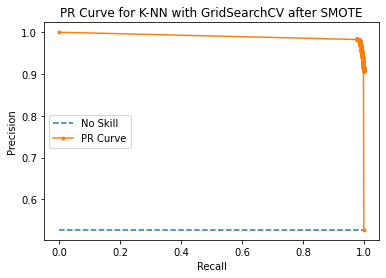

In [223]:
# Print ROC Curve
printROCCurve(x_test, y_test, knn2_grid_search, 'ROC Curve for K-NN with GridSearchCV after SMOTE')

# Print PR Curve
printPRCurve(x_test, y_test, knn2_grid_search, 'PR Curve for K-NN with GridSearchCV after SMOTE')